# Quick start

## Project Structure

PyCellID is an Open Source python package designed for recursively navigating a path and tracking down data tables and metadata (mapping), returning a unique CellData object. It relates easily the data with the associated images.

The power of PycellID will be maximized when working with images of time series.

file structure:

```bash
~folder_location
|
|--- my_experiment/
     |
     |---Position01/
     |   |---mapping.txt
     |   |---out_all.txt
     |   |
     |---Position02/
     |   |--- ...
     |   |
     |---Position03/
     |   |--- ...
     |   |
     |---Position32/
     |   |--- ...
     |   |
     |---channel-x_Position01_time01.tif
     |---channel-x_Position01_time01.tif.out.tif
     |--- ...
     |---channel-z_PositionW_timeY.tif
```

### Resource helpers


In [1]:
# Build or load your data, inspect your images and make plots.
from pycellid.core import CellData, CellsPloter
# Build or load data frame.
import pycellid.io as ld
# Get a 2-D aray representing your images.
from pycellid import images
import matplotlib.pyplot as plt

## Load your data<a id="1"></a>

### Load your data frame<a id="1.1"></a>

Instantiate a CellData from your data table and the path to your images.

### From Cell-ID output<a id="1.2.1"></a>

In [2]:
df = CellData.from_csv('samples_cellid')

In [3]:
display(df)

,pos,t_frame,ucid,cellID,time,xpos,ypos,a_tot,num_pix,fft_stat,...,f_nucl_tag6_tfp,f_nucl_tag6_yfp,f_local_bg_cfp,f_local_bg_rfp,f_local_bg_tfp,f_local_bg_yfp,f_local2_bg_cfp,f_local2_bg_rfp,f_local2_bg_tfp,f_local2_bg_yfp
0,1,0,100000000000,0,0,29,725,527.0,527,0.387982,...,1675334.0,54200.0,378.6183,240.4300,12571.83,312.5942,372.9697,241.2194,12523.050,310.0760
1,1,1,100000000000,0,0,31,725,614.0,614,0.443545,...,1473843.0,54020.0,383.6143,240.4676,12212.17,319.5286,377.4458,240.1235,12138.300,317.3976
2,1,2,100000000000,0,0,31,724,639.0,639,0.500724,...,1451150.0,46463.0,379.6064,241.2868,11988.62,322.5431,376.9560,242.0784,11993.090,323.3418
3,1,3,100000000000,0,0,31,725,688.0,688,0.591332,...,1566434.0,47871.0,390.2697,436.6727,11646.41,330.3378,391.3493,437.9252,11549.440,331.3429
4,1,4,100000000000,0,0,24,721,457.0,457,0.085026,...,1204067.0,52761.0,372.6058,241.3909,11593.46,330.6237,367.9105,242.5352,11503.960,329.0977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18184,3,12,300000000720,720,0,802,736,147.0,147,0.556508,...,1237009.0,39586.0,520.8205,254.4151,10049.78,612.9800,522.1818,254.9767,10533.790,621.8302
18185,3,12,300000000721,721,0,840,707,391.0,391,0.040324,...,1053566.0,44035.0,477.8000,248.6977,11320.68,576.1446,463.5887,250.3025,11368.400,571.9272
18186,3,12,300000000722,722,0,915,827,587.0,587,0.672861,...,1534440.0,58636.0,508.6136,250.6716,9132.60,578.7262,509.0000,250.9851,9129.724,572.0000
18187,3,12,300000000723,723,0,986,336,119.0,119,0.494793,...,469596.0,36213.0,530.8571,250.7143,11290.47,423.6049,536.5789,251.0638,11238.870,423.4595


## Inspect your data<a id="2"></a>

The development team decided to use [pandas](https://pandas.pydata.org/docs/) library as backend because of its syntax and its extensive documentation.
The idea is to make you feel you are working with a pandas object, but with the flexibility of having access to your experimental images.<br>

*You would be able to choose from different backends in future versions*.

In [4]:
df.describe()

,pos,t_frame,ucid,cellID,time,xpos,ypos,a_tot,num_pix,fft_stat,...,f_nucl_tag6_tfp,f_nucl_tag6_yfp,f_local_bg_cfp,f_local_bg_rfp,f_local_bg_tfp,f_local_bg_yfp,f_local2_bg_cfp,f_local2_bg_rfp,f_local2_bg_tfp,f_local2_bg_yfp
count,18189.000000,18189.000000,1.818900e+04,18189.000000,18189.0,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,...,1.818900e+04,1.818900e+04,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000,18189.000000
mean,1.966078,6.216944,1.966078e+11,317.438947,0.0,683.000935,529.324097,441.458959,441.460718,0.265314,...,1.258965e+06,1.087345e+05,462.553463,258.523334,11753.645404,502.869092,459.888134,258.526309,11921.632917,489.371202
std,0.793782,3.726506,7.937819e+10,204.508054,0.0,396.587704,289.357639,241.039776,241.038580,0.225960,...,4.217068e+05,1.837672e+05,42.853657,50.494524,1378.053509,349.180950,44.225006,50.631219,1297.764306,308.290503
min,1.000000,0.000000,1.000000e+11,0.000000,0.0,9.000000,9.000000,98.000000,98.000000,0.018116,...,2.100890e+05,7.107000e+03,314.227900,232.300000,6984.529000,0.000000,316.946400,231.608700,0.000000,0.000000
25%,1.000000,3.000000,1.000000e+11,150.000000,0.0,327.000000,285.000000,277.000000,277.000000,0.068958,...,9.154950e+05,2.818300e+04,439.835400,244.754400,10809.180000,350.870100,435.564800,244.753600,11063.320000,351.651900
50%,2.000000,6.000000,2.000000e+11,297.000000,0.0,681.000000,538.000000,384.000000,384.000000,0.202481,...,1.177204e+06,4.325000e+04,463.130400,248.077800,11783.600000,397.611100,458.925400,248.076900,11939.820000,397.530600
75%,3.000000,9.000000,3.000000e+11,452.000000,0.0,1025.000000,779.000000,555.000000,555.000000,0.420594,...,1.592472e+06,1.144470e+05,486.517200,251.027400,12781.720000,511.681500,484.095600,250.980100,12887.200000,501.397500
max,3.000000,12.000000,3.000000e+11,966.000000,0.0,1384.000000,1032.000000,1499.000000,1499.000000,2.200194,...,2.342580e+06,2.358444e+06,734.365400,615.073200,15438.730000,6654.856000,971.200000,618.813700,15294.890000,7044.286000


### Using Cell-ID features<a id="2.1"></a>

## Cell-ID together with PyCellID provide 5 categories of calculated variables:

**1. General measurments**.

```
pos,
cellID,
ucid,
t_frame,
time,
xpos,
ypos,
f_tot,
a_tot,
fft_stat,
perim,
maj_axis,
min_axis,
flag,
rot_vol,
con_vol,
a_vacuole,
f_bg
```

**2. To calculate membrane proximal fluorescence (for relocalization experiment)**.
    
```
f_tot_p1_channels,
a_tot_p1,
f_tot_m1_channels,
a_tot_m1,x
f_tot_m2_channels,
a_tot_m2,
f_tot_m3_channels,
a_tot_m3
```
    
**3. Information obtained from "nuclear image" type (Variables containing the area and fluorescence of concentric disks of user-defined radius)**.

```
f_nucl_channels,
f_nucl1_channels to f_nucl6_channels,
a_nucl1 to a_nucl6,
f_nucl_tag1_channels to f_nucl_tag6_channels
```

**4. More background information**.

```
f_local_bg_channels,
a_local_bg,
a_local,
f_local2_bg_channels,
a_local2_bg,
a_local2
```

**5. More volume measurments**.

```
a_surf, sphere_vol, 
```

   *the final tag* `_channels` *indicates that the vatiable will be repeated for each illumination type.*

For detailed information, reading [Cell-ID](https://currentprotocols.onlinelibrary.wiley.com/doi/10.1002/0471142727.mb1418s100) documentation is recomended.

<AxesSubplot:>

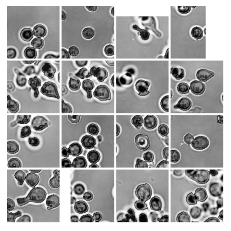

In [5]:
df.plot()

### View your images<a id="2.2"></a>

Obtain a numpy array representation of an image.
Make a crop, operate o simply plot it.

In [6]:
img = plt.imread("samples_cellid/YFP_Position01_time01.tif")

array = images.box_img(im=img, x_pos=640, y_pos=560, radius=30, mark_center=False)

array

array([[371., 348., 330., ...,   0.,   0.,   0.],
       [368., 351., 368., ...,   0.,   0.,   0.],
       [370., 363., 351., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

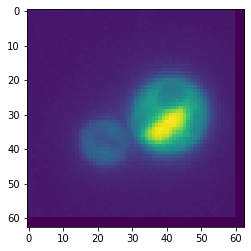

In [7]:
plt.imshow(array)

You can use PycellID accessor  to inspect images.
+ Use data from your dataframe for finding what you are looking for.

<AxesSubplot:>

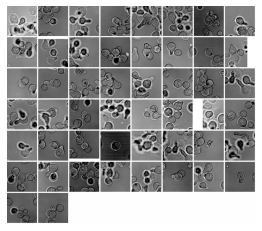

In [8]:
# Specify your values.
df.plot(array_img_kws={"channel":"tfp", "n":50, "criteria":{"a_tot":[0, 500]}})

### Use CellsPloter to inspect images

In [9]:
cells = CellsPloter(df)

<AxesSubplot:>

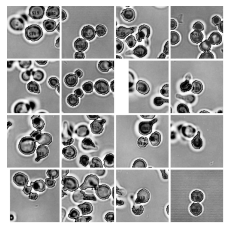

In [10]:
cells.cells_image()